### Import Libraries

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

### Data Loading

In [15]:
base_dir="dataset/"

In [16]:
class_labels=os.listdir(base_dir)
print(class_labels)

['EA', 'EH', 'EP', 'NE']


In [17]:
data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=True, color_mode='grayscale', target_size=(128,128))
            image=img_to_array(image)
            image=image/255.0
            data.append([image,count])
        except Exception as e:
                pass
    count=count+1

dataset/EA


C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


dataset/EH
dataset/EP
dataset/NE


In [31]:
print(len(data))

2681


In [32]:
X,y =zip(*data)

In [33]:
X

(array([[[0.31764707],
         [0.34509805],
         [0.39607844],
         ...,
         [0.20784314],
         [0.20784314],
         [0.43137255]],
 
        [[0.35686275],
         [0.41568628],
         [0.4392157 ],
         ...,
         [0.3647059 ],
         [0.2627451 ],
         [0.52156866]],
 
        [[0.6392157 ],
         [0.3882353 ],
         [0.2784314 ],
         ...,
         [0.28235295],
         [0.15686275],
         [0.6745098 ]],
 
        ...,
 
        [[0.18431373],
         [0.27450982],
         [0.3137255 ],
         ...,
         [0.8117647 ],
         [0.8156863 ],
         [0.8039216 ]],
 
        [[0.36078432],
         [0.25882354],
         [0.21960784],
         ...,
         [0.8       ],
         [0.8117647 ],
         [0.8039216 ]],
 
        [[0.38039216],
         [0.28627452],
         [0.2627451 ],
         ...,
         [0.61960787],
         [0.7176471 ],
         [0.7882353 ]]], dtype=float32),
 array([[[0.4509804 ],
         [0.38039

In [34]:
print(y)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [35]:
X=np.array(X)
y=np.array(y)

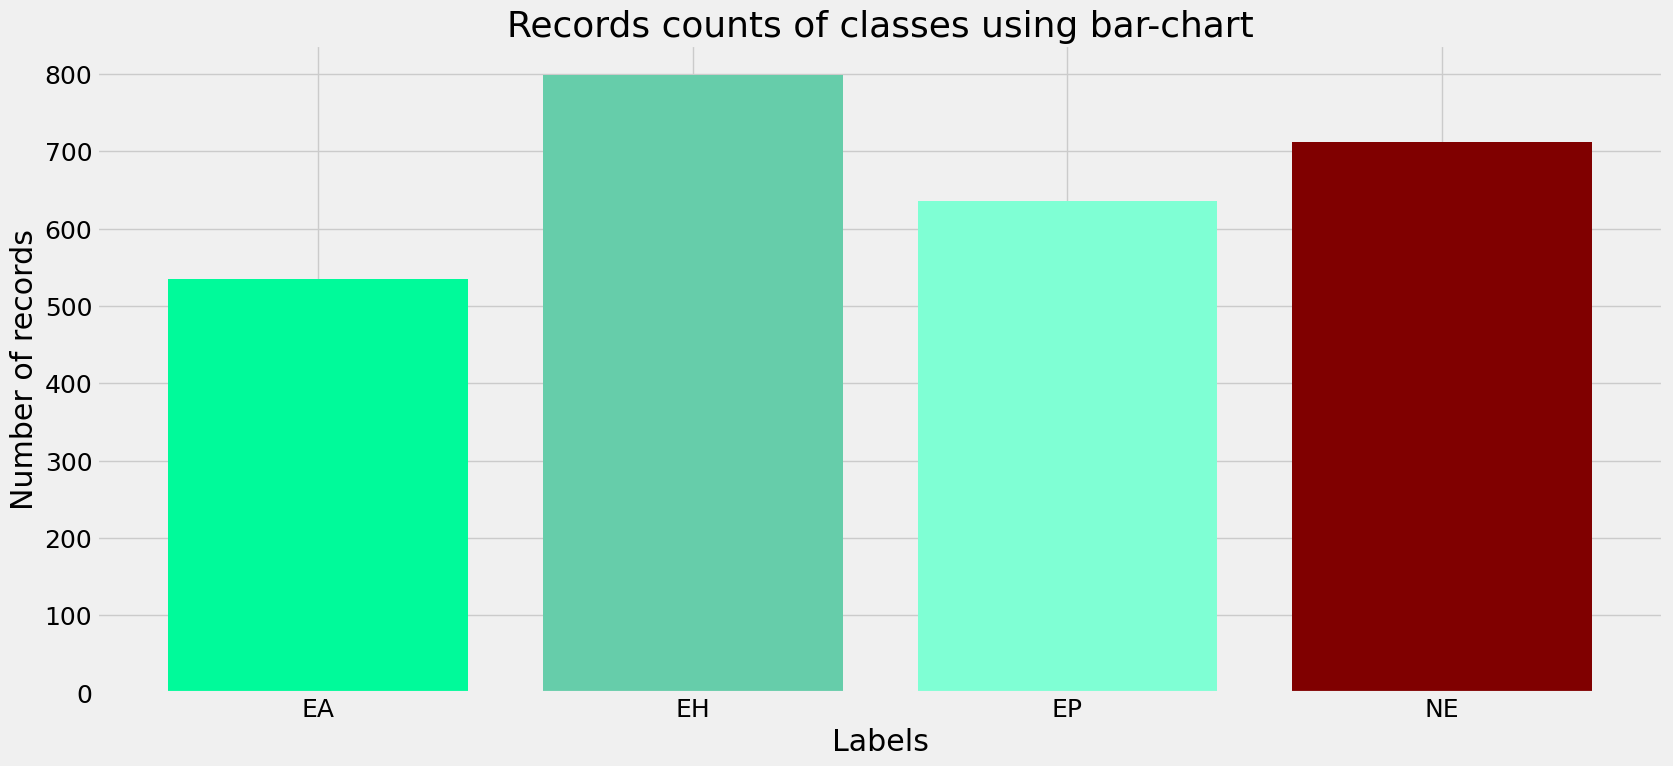

In [36]:
unique,counts=np.unique(y,return_counts=True)
chart_data=list(counts)
chart_labels=['EA','EH','EP','NE']
colors=['mediumspringgreen','mediumaquamarine','aquamarine','maroon']
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size']=18
    plt.bar(x=chart_labels,height=chart_data,color=colors)
    plt.title(label='Records counts of classes using bar-chart')
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of records')
    plt.show()

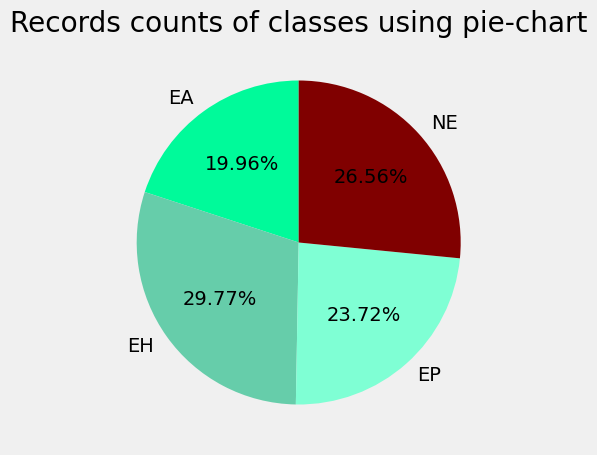

In [37]:
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(5,5))
    plt.pie(x=chart_data,labels=chart_labels,colors=colors,autopct='%.2f%%',explode=None,startangle=90)
    plt.title(label='Records counts of classes using pie-chart')
    plt.show()

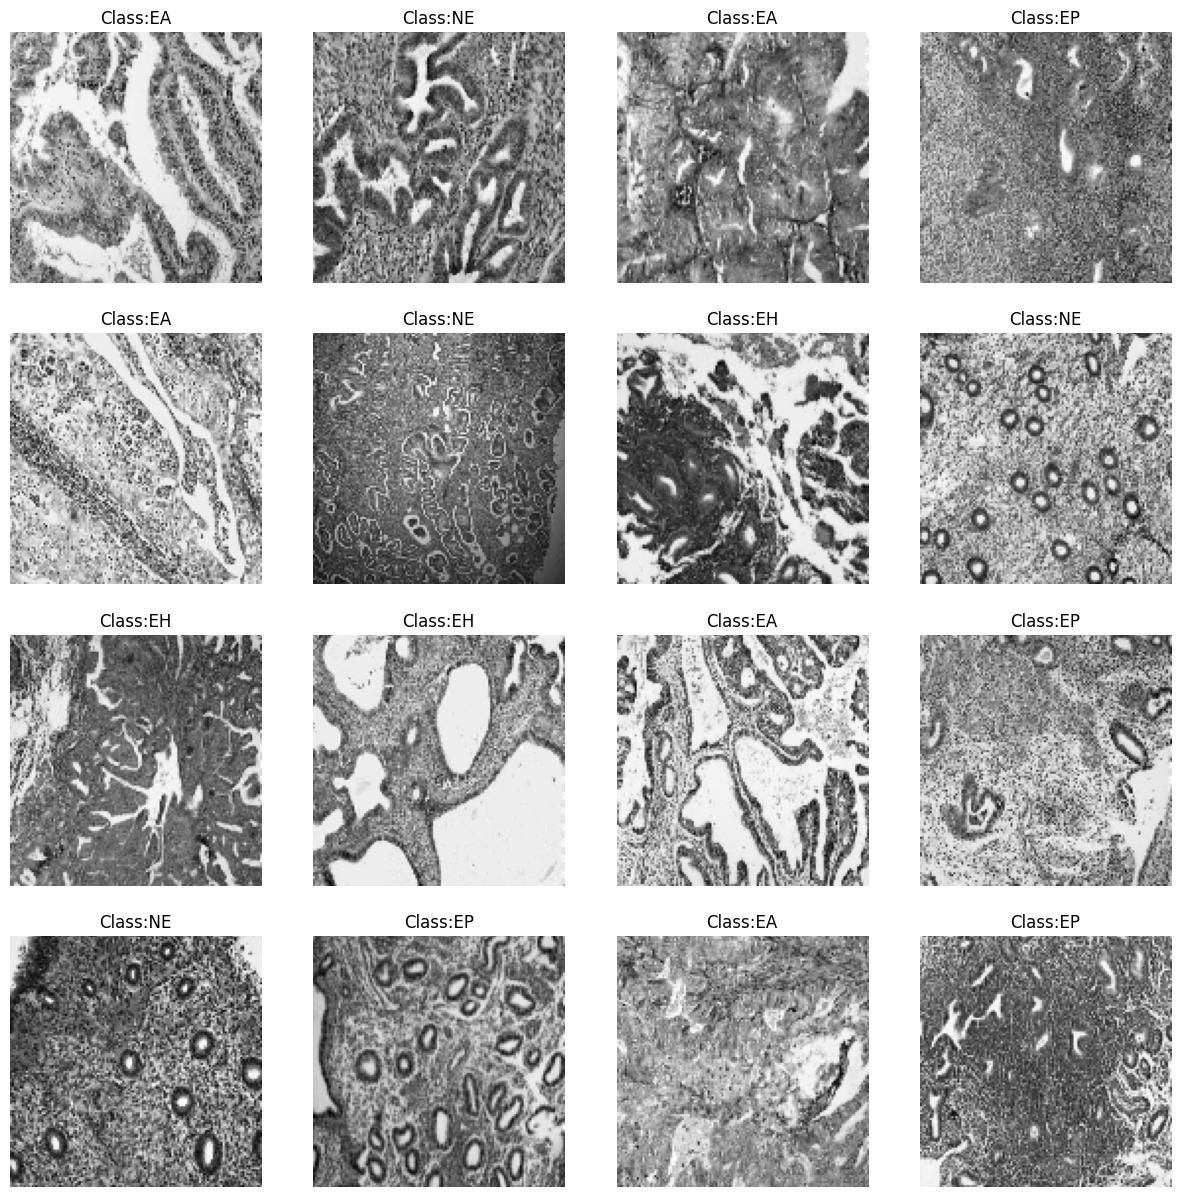

In [39]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        #idx = randint(0, 2890)
        idx = randint(0, 2790)
        plt.imshow(x[idx],cmap='gray')
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X,y)

### Data Splitting

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Algorithm - Convolutional Neural Network

In [41]:
y_train=to_categorical(y_train,dtype="int32")
y_test=to_categorical(y_test,dtype="int32")

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [43]:
cnn_model=Sequential()

cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(2,2),padding="same",activation="relu",input_shape = (128,128,1)))
cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(2,2),padding="same",activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Flatten())
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Dense(units=512,activation="relu"))
cnn_model.add(Dense(units=4,activation="softmax"))

In [44]:
cnn_model.compile(optimizer=Adam(learning_rate=1e-4),loss="categorical_crossentropy",metrics=["accuracy"])

In [45]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         1

In [46]:
history=cnn_model.fit(x=X_train,y=y_train,batch_size=64,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
34/34 [==============================] - 63s 2s/step - loss: 1.3771 - accuracy: 0.2948 - val_loss: 1.3825 - val_accuracy: 0.2793
Epoch 2/20
34/34 [==============================] - 60s 2s/step - loss: 1.3599 - accuracy: 0.3092 - val_loss: 1.3813 - val_accuracy: 0.2793
Epoch 3/20
34/34 [==============================] - 62s 2s/step - loss: 1.3484 - accuracy: 0.3200 - val_loss: 1.3820 - val_accuracy: 0.2793
Epoch 4/20
34/34 [==============================] - 66s 2s/step - loss: 1.3348 - accuracy: 0.3302 - val_loss: 1.3802 - val_accuracy: 0.2793
Epoch 5/20
34/34 [==============================] - 65s 2s/step - loss: 1.3090 - accuracy: 0.3424 - val_loss: 1.3792 - val_accuracy: 0.2905
Epoch 6/20
34/34 [==============================] - 61s 2s/step - loss: 1.2618 - accuracy: 0.4184 - val_loss: 1.3773 - val_accuracy: 0.3073
Epoch 7/20
34/34 [==============================] - 55s 2s/step - loss: 1.2006 - accuracy: 0.4571 - val_loss: 1.3745 - val_accuracy: 0.2998
Epoch 8/20
34/34 [==

### Accuracy plot-graphs

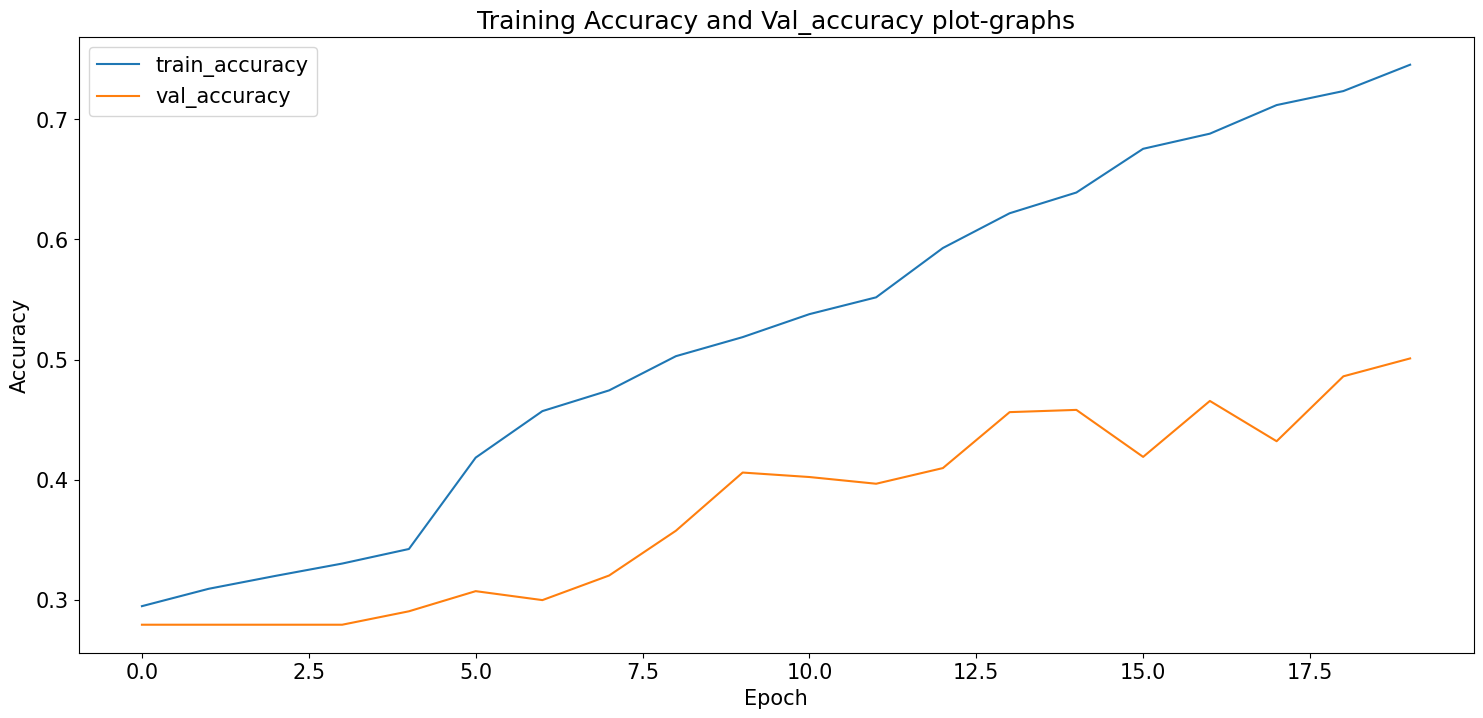

In [48]:
plt.figure(figsize=(18,8))
plt.rcParams["font.size"]=15
plt.plot(history.history["accuracy"],label="train_accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.title(label="Training Accuracy and Val_accuracy plot-graphs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("acc_graph.png")
plt.show()


In [49]:
cnn_prediction=cnn_model.predict(X_test,batch_size=64,verbose=1)

9/9 [==============================] - 5s 496ms/step


In [50]:
print(cnn_prediction)

[[5.09864092e-01 4.19531167e-01 5.85561767e-02 1.20486505e-02]
 [1.26903415e-01 1.58666775e-01 6.81995451e-01 3.24343406e-02]
 [2.45040134e-02 3.08824867e-01 6.07286274e-01 5.93849197e-02]
 ...
 [1.65191712e-03 2.82745995e-03 1.45260975e-01 8.50259542e-01]
 [7.40094751e-04 2.19435035e-03 2.01459303e-01 7.95606315e-01]
 [4.03023362e-01 1.42763406e-01 3.18295300e-01 1.35917887e-01]]


In [51]:
cnn_labels=[]
for i in range(len(cnn_prediction)):
    cnn_labels.append(np.argmax(cnn_prediction[i]))

In [52]:
print(cnn_labels)

[0, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 3, 0, 3, 3, 3, 1, 1, 3, 3, 0, 1, 2, 3, 2, 3, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 3, 2, 3, 2, 1, 2, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 1, 2, 2, 1, 3, 1, 1, 1, 0, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 2, 3, 3, 1, 2, 1, 3, 1, 2, 0, 3, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 2, 2, 1, 1, 1, 3, 1, 0, 1, 3, 2, 1, 2, 3, 1, 3, 3, 1, 3, 3, 1, 2, 1, 2, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 3, 3, 0, 2, 1, 3, 1, 2, 3, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 2, 1, 1, 3, 3, 2, 3, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 3, 1, 1, 1, 3, 0, 3, 3, 1, 3, 1, 2, 1, 1, 1, 2, 3, 0, 2, 0, 2, 3, 3, 0, 1, 3, 2, 3, 3, 1, 1, 0, 2, 2, 3, 3, 3, 1, 3, 2, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 1, 1, 2, 3, 3, 2, 3, 1, 2, 2, 2, 3, 2, 1, 1, 1, 3, 1, 3, 0, 2, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 3, 3, 1, 1, 3, 0, 1, 0, 1, 1, 1, 3, 1, 

In [53]:
true_labels=[]
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))

In [54]:
print(true_labels)

[1, 2, 2, 2, 0, 0, 3, 0, 2, 1, 3, 1, 3, 3, 1, 3, 0, 3, 2, 3, 2, 1, 3, 3, 0, 1, 1, 2, 0, 3, 3, 2, 1, 0, 1, 1, 0, 2, 3, 1, 3, 0, 2, 1, 2, 2, 3, 1, 1, 1, 3, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 3, 1, 0, 1, 2, 1, 0, 2, 1, 3, 3, 1, 0, 1, 3, 0, 3, 1, 1, 1, 3, 3, 0, 3, 1, 0, 3, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 3, 1, 3, 1, 0, 1, 3, 3, 1, 1, 3, 3, 2, 3, 3, 2, 3, 2, 2, 0, 0, 0, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3, 1, 2, 1, 1, 1, 3, 3, 0, 0, 3, 1, 2, 0, 3, 2, 1, 2, 2, 1, 0, 0, 1, 1, 3, 1, 3, 1, 0, 3, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 3, 3, 2, 1, 2, 1, 0, 2, 3, 1, 0, 1, 0, 0, 1, 3, 1, 1, 3, 2, 3, 1, 2, 3, 1, 2, 3, 3, 3, 1, 3, 0, 2, 2, 2, 3, 1, 0, 1, 0, 1, 3, 2, 0, 0, 0, 3, 0, 3, 1, 3, 0, 3, 2, 0, 3, 3, 1, 0, 3, 1, 3, 3, 0, 1, 0, 2, 3, 2, 0, 2, 2, 3, 2, 3, 1, 1, 0, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 3, 3, 3, 1, 1, 2, 0, 0, 1, 3, 0, 3, 3, 1, 0, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 2, 0, 2, 1, 2, 1, 2, 3, 0, 0, 1, 1, 0, 0, 3, 1, 1, 0, 1, 0, 0, 0, 3, 0, 2, 1, 3, 3, 3, 0, 2, 2, 1, 3, 1, 

### Result Analysis

***Accuracy Score***

In [55]:
cnn_accuracy=accuracy_score(y_true=true_labels,y_pred=cnn_labels)
print("CNN Accuracy is {:.2f}%".format(cnn_accuracy*100.0))

CNN Accuracy is 50.09%


***Classification Report***

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_true=true_labels,y_pred=cnn_labels,target_names=class_labels))

              precision    recall  f1-score   support

          EA       0.62      0.30      0.41       115
          EH       0.46      0.73      0.56       150
          EP       0.37      0.30      0.33       118
          NE       0.60      0.58      0.59       154

    accuracy                           0.50       537
   macro avg       0.51      0.48      0.47       537
weighted avg       0.52      0.50      0.49       537



***Confusion Matrix***

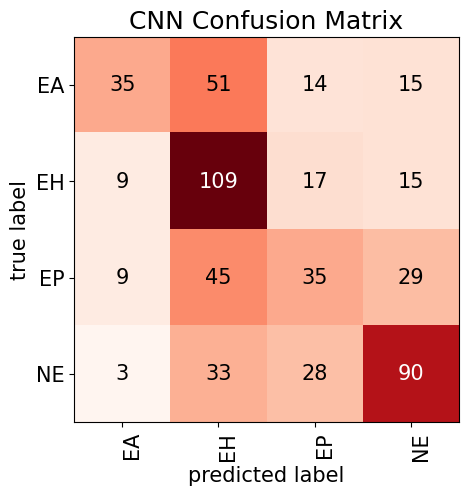

In [59]:
import mlxtend
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=cnn_labels),
                        figsize=(10,5),
                        class_names=class_labels,
                        cmap=plt.cm.Reds)
plt.title(label="CNN Confusion Matrix")
plt.xticks(rotation=90)
plt.savefig("conf_mat.png")
plt.show()


## Model Saving

In [58]:
pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
cnn_model.save(filepath="models/Convolutional_Neural_Network.h5")

NameError: name 'cnn_model' is not defined

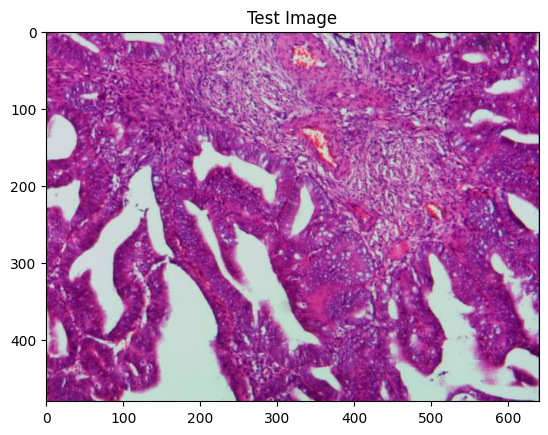

Prediction Result: [9.2391634e-01 5.6431368e-02 1.9228300e-02 4.2401568e-04]
Class number: 0
Predicted class: EA


In [24]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained CNN model
cnn_model_path = "models/Convolutional_Neural_Network.h5"
cnn_model = load_model(cnn_model_path)

# Define the classes
class_labels = os.listdir(base_dir)

# Function to prepare the image for prediction
def prepare_test_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128), grayscale=True)
    x = image.img_to_array(img)
    x = x / 255.0
    return np.expand_dims(x, axis=0)

# Function to predict and display the result
def predict_and_display_image(model, img_path, class_labels):
    result = model.predict(prepare_test_image(img_path))
    img = cv2.imread(img_path)

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Test Image')
    plt.show()

    print("Prediction Result:", result[0])

    class_result = np.argmax(result, axis=1)
    print("Class number:", class_result[0])
    print("Predicted class:", class_labels[class_result[0]])

# Test with an image
test_image_path = 'C:\\Users\\DELL\\Desktop\\Endometrium\\a.jpg'  # Replace with the actual path of your test image
predict_and_display_image(cnn_model, test_image_path, class_labels)
